**Introduction**

In [242]:
from sklearn.linear_model import LinearRegression

In [243]:
example_model = LinearRegression()
example_model

LinearRegression()

In [244]:
new_example_model = LinearRegression(fit_intercept=False, positive=True, copy_X = False)
new_example_model

LinearRegression(copy_X=False, fit_intercept=False, positive=True)

In [245]:
import numpy as np

In [246]:
X = np.arange(30).reshape((10,3))
y = range(10)

In [247]:
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26],
       [27, 28, 29]])

In [248]:
y

range(0, 10)

In [249]:
from sklearn.model_selection import train_test_split


In [250]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4)

In [251]:
example_model.fit(X_train, y_train)

LinearRegression()

In [252]:
example_predictions = example_model.predict(X_test)

 **Importing the Libraries**

In [253]:
import numpy as np
import pandas as pd

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Loading the dataset**

In [255]:
df = sns.load_dataset("mpg")

In [256]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [258]:
df.drop(["name"], axis= 1, inplace=True)

In [259]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


**Summary od Dataset**

In [260]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Data preprocessing**

In [261]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [262]:
df[df.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [263]:
df.dropna(inplace = True)

In [264]:
df.isnull().sum().any()

False

In [265]:
df.shape

(392, 8)

**Univariate Analysis**

In [266]:
df.cylinders.unique()


array([8, 4, 6, 3, 5], dtype=int64)

In [267]:
df.cylinders.value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

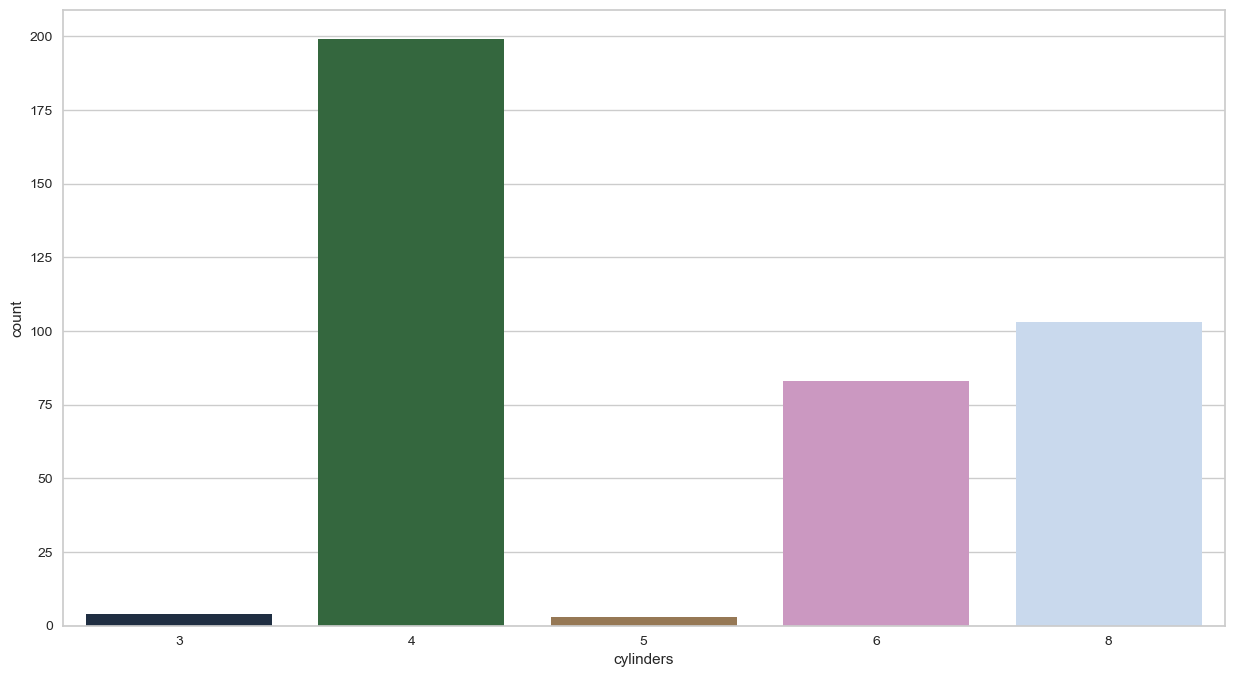

In [268]:
plt.figure(figsize = (15,8))
sns.countplot(x = df["cylinders"], data = df, palette = "cubehelix")
plt.show()

In [269]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [270]:
 df["model_year"] = (1900 + df.model_year)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


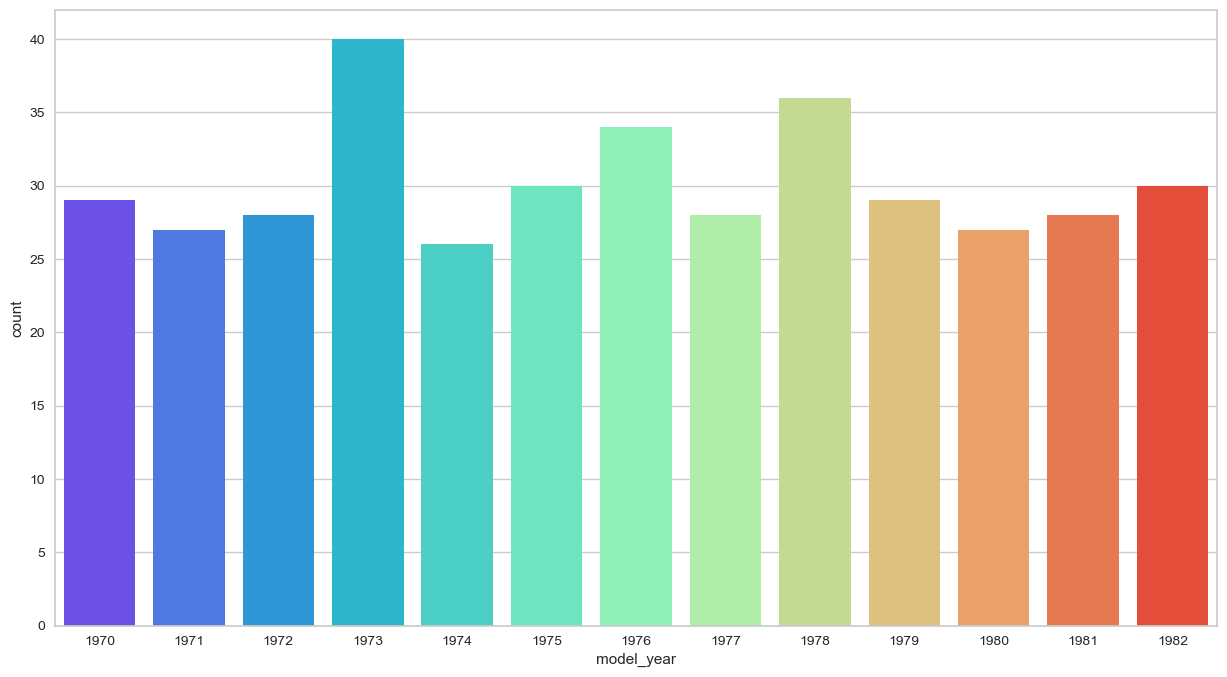

In [271]:
plt.figure(figsize = (15,8))
sns.countplot(x = df["model_year"], data = df, palette = "rainbow")
plt.show()

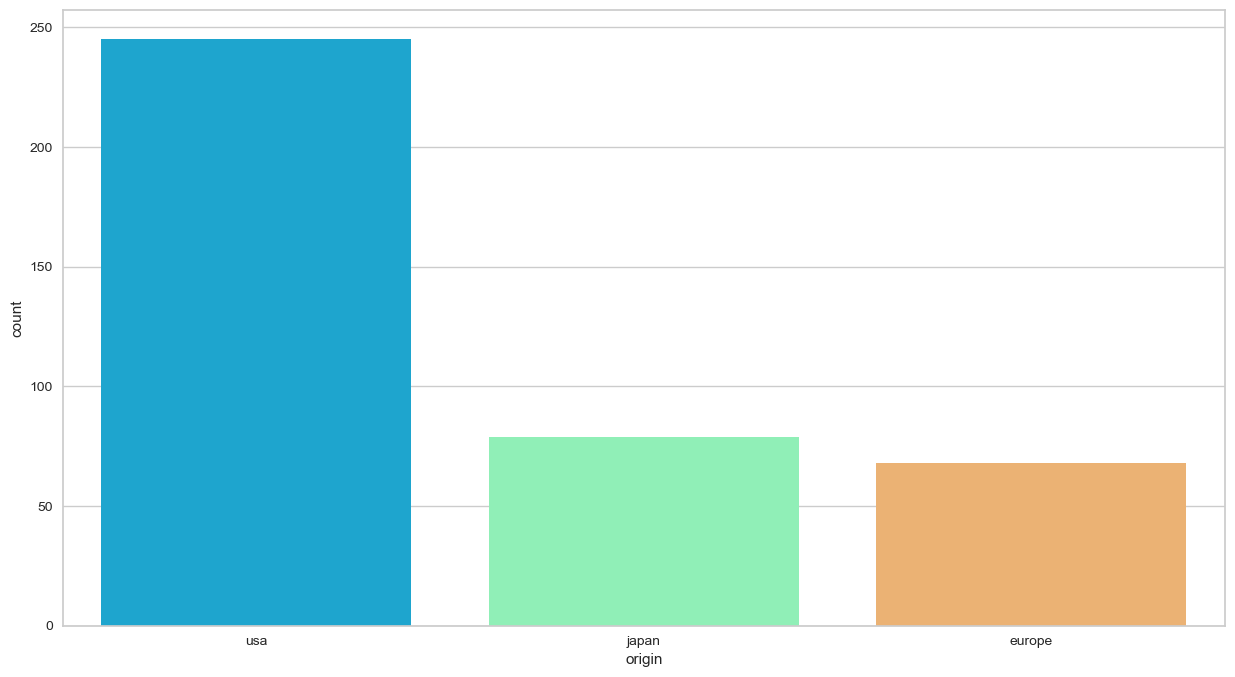

In [272]:
plt.figure(figsize = (15,8))
sns.countplot(x = df["origin"], data = df, palette = "rainbow")
plt.show()

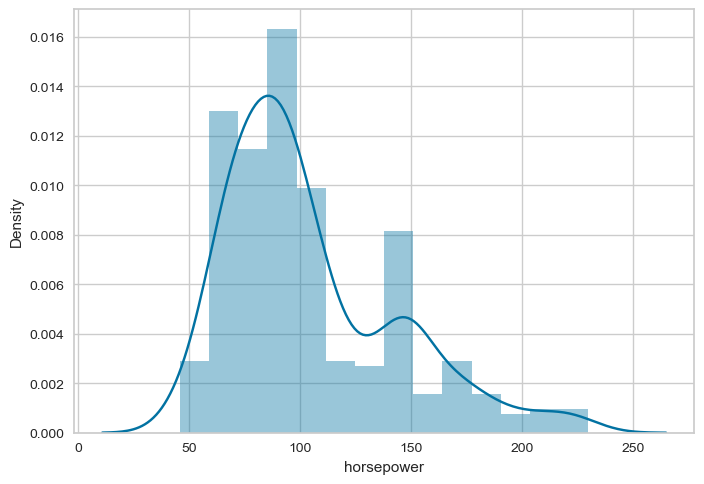

In [273]:
sns.distplot(df["horsepower"])
plt.show()

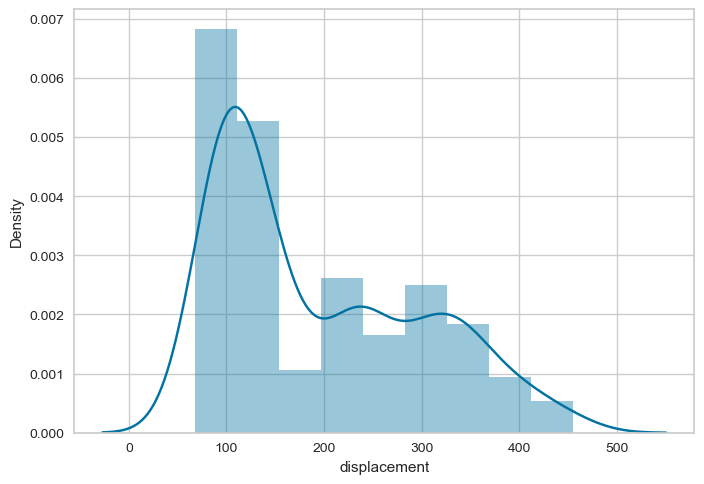

In [274]:
sns.distplot(df["displacement"])
plt.show()

**Bivariate Analysis**

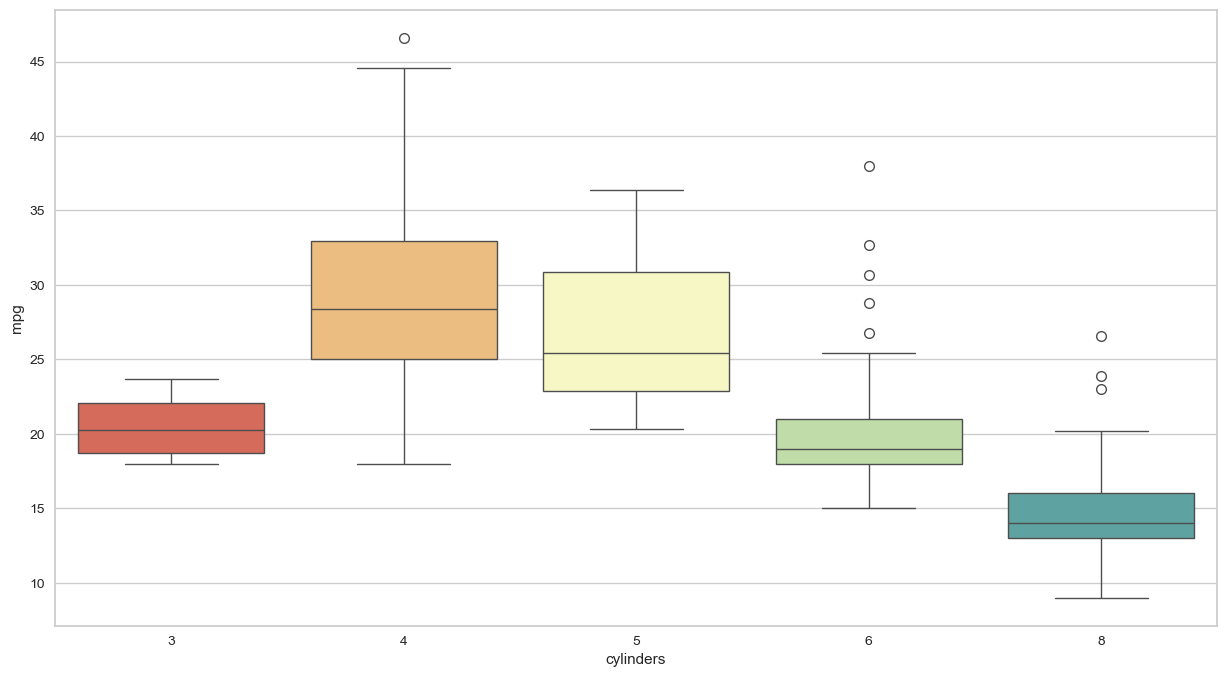

In [275]:
plt.figure(figsize = (15,8))
sns.boxplot(x = "cylinders", y = "mpg", data=df, palette = "Spectral")
plt.show()

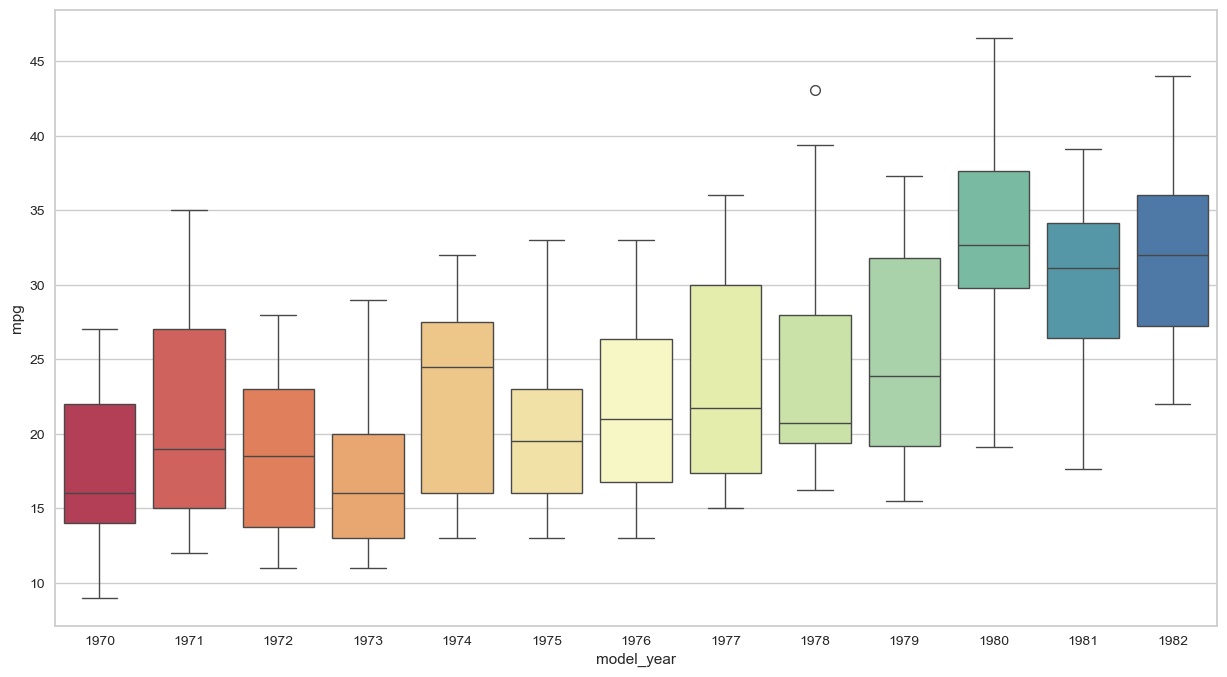

In [276]:
plt.figure(figsize = (15,8))
sns.boxplot(x = "model_year", y = "mpg", data=df, palette = "Spectral")
plt.show()

**Multivariate Analysis**

In [277]:
sns.Implot(x = "horsepower", y = "mpg", hue = "origin", data = df, palette = "rainbow")
plt.show()

AttributeError: module 'seaborn' has no attribute 'Implot'

**Heatmap of Correlation Matrix**

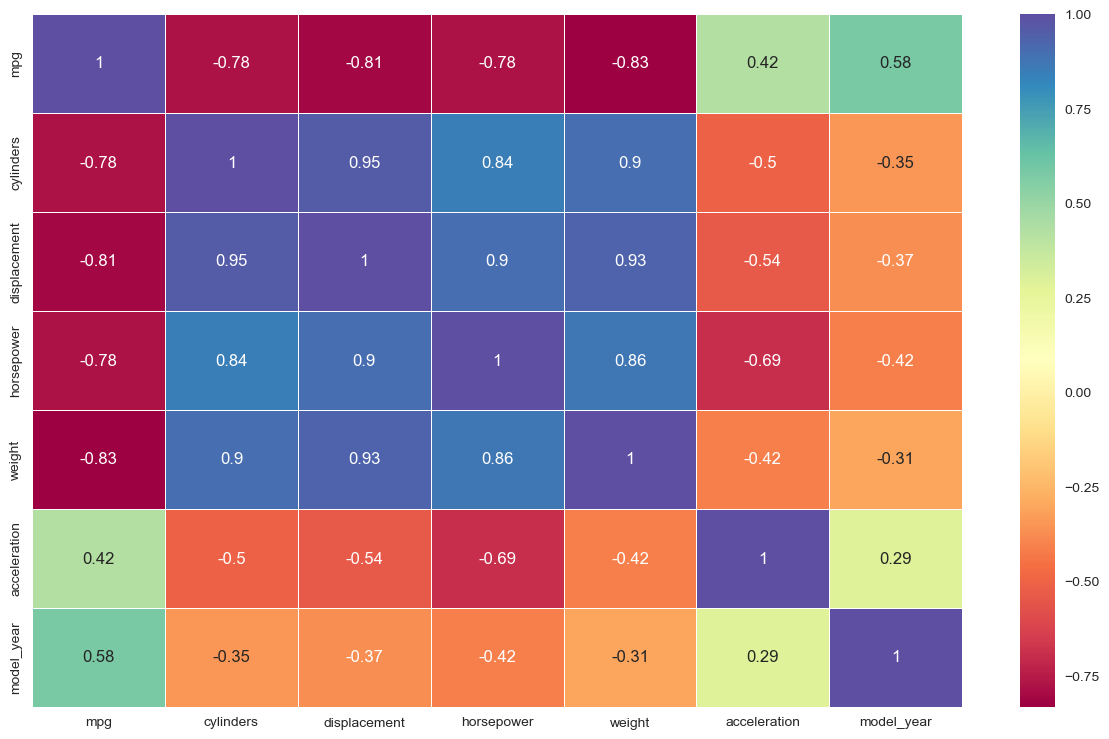

In [278]:
plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(numeric_only=True), annot = True, linewidth = 0.5, cmap = "Spectral")
plt.show()

In [279]:
df.drop(["acceleration", "displacement"], axis = 1, inplace = True)
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin
0,18.0,8,130.0,3504,1970,usa
1,15.0,8,165.0,3693,1970,usa
2,18.0,8,150.0,3436,1970,usa
3,16.0,8,150.0,3433,1970,usa
4,17.0,8,140.0,3449,1970,usa


In [280]:
from datetime import datetime

In [281]:
today = datetime.today()

In [282]:
today


datetime.datetime(2024, 7, 24, 18, 11, 6, 805680)

In [283]:
this_year = today.year
this_year

2024

In [284]:
df["age"] = this_year - df.model_year
df.drop(["model_year"], axis = 1, inplace = True)

In [285]:
df.head()

,mpg,cylinders,horsepower,weight,origin,age
0,18.0,8,130.0,3504,usa,54
1,15.0,8,165.0,3693,usa,54
2,18.0,8,150.0,3436,usa,54
3,16.0,8,150.0,3433,usa,54
4,17.0,8,140.0,3449,usa,54


In [286]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [287]:
df = pd.get_dummies(df, drop_first = True, dtype=int)

In [288]:
df.head()

,mpg,cylinders,horsepower,weight,age,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,0,1
1,15.0,8,165.0,3693,54,0,1
2,18.0,8,150.0,3436,54,0,1
3,16.0,8,150.0,3433,54,0,1
4,17.0,8,140.0,3449,54,0,1


**Modelling**

In [289]:
X = df.drop(["mpg"], axis = 1)
y = df["mpg"]

In [290]:
from sklearn.model_selection import train_test_split

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [292]:
X_train

,cylinders,horsepower,weight,age,origin_japan,origin_usa
260,6,110.0,3620,46,0,1
184,4,92.0,2572,48,0,1
174,6,97.0,2984,49,0,1
64,8,150.0,4135,52,0,1
344,4,64.0,1875,43,0,1
...,...,...,...,...,...,...
72,8,150.0,3892,52,0,1
107,6,100.0,2789,51,0,1
272,4,85.0,2855,46,0,1
352,4,65.0,2380,43,0,1


In [293]:
y_train

260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
       ... 
72     15.0
107    18.0
272    23.8
352    29.9
103    11.0
Name: mpg, Length: 313, dtype: float64

In [294]:
from sklearn.linear_model import LinearRegression

In [295]:
ln_model = LinearRegression()

In [296]:
ln_model.fit(X_train, y_train)

LinearRegression()

In [297]:
ln_model.intercept_

79.80442103966975

In [298]:
coef_param = pd.DataFrame(ln_model.coef_, index = X.columns, columns = ["Coefficient"])
coef_param

,Coefficient
cylinders,0.203056
horsepower,-0.014143
weight,-0.005729
age,-0.779904
origin_japan,0.401853
origin_usa,-2.385047


In [299]:
y_pred = ln_model.predict(X_test)

In [300]:
my_dict = {"Actual": y_test, "Pred" : y_pred}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
143,26.0,27.341789
210,19.0,25.676064
58,25.0,24.365480
57,24.0,26.069444
367,28.0,29.307229
83,28.0,24.147781
40,14.0,11.747138
194,22.5,22.255749
276,21.6,27.102313
34,16.0,16.116050


In [301]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [302]:
def evaluation_metrics(actual, pred):
    MAE = mean_absolute_error(actual, pred)
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(mean_squared_error(actual, pred))
    SCORE = r2_score(actual, pred)
    return print("r2_score:", SCORE, "\n","mae:", MAE, "\n","mse:",MSE, "\n","rmse:",RMSE)

In [303]:
evaluation_metrics(y_test, y_pred)

r2_score: 0.7798249880881916 
 mae: 2.5188281576150846 
 mse: 11.237861022823017 
 rmse: 3.3522919059686638


In [304]:
!pip install yellowbrick

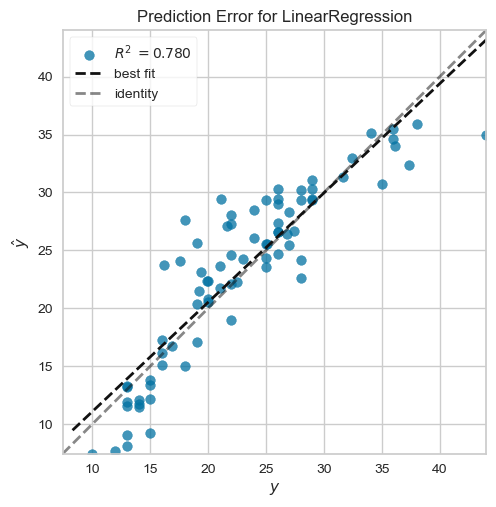

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [305]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(ln_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

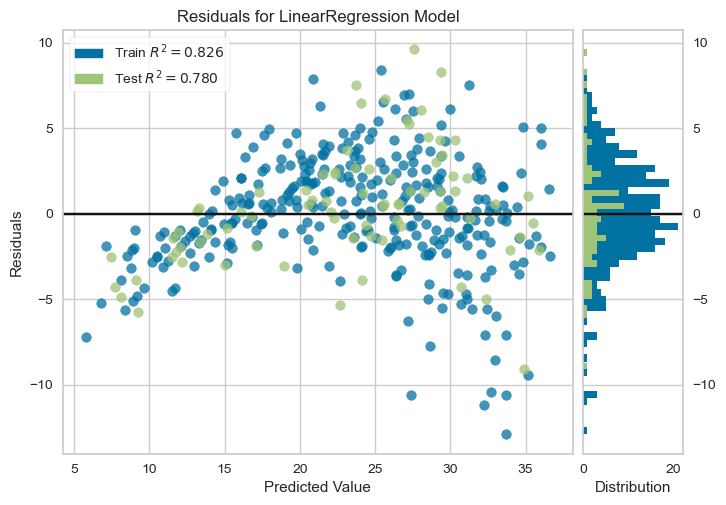

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [306]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(ln_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()